In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# =============================
# Load Datasets
# =============================
facebook_df = pd.read_csv("Dataset_Facebook.csv", sep=';')
heart_df = pd.read_csv("heart.csv")
air_df = pd.read_csv("AirQuality.csv", sep=';', decimal=',')

# Clean air quality data
air_df = air_df.dropna(axis=1, how='all')
air_df = air_df.dropna()

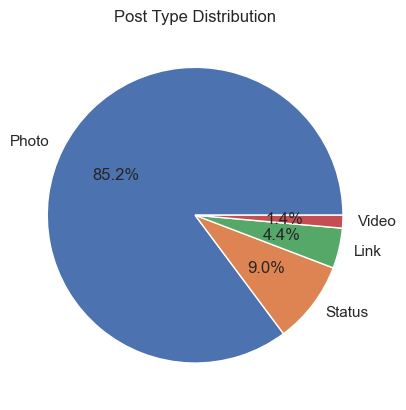

In [55]:
# =============================
# 📘 Facebook Dataset Visuals
# =============================

# PIE CHART - Post Type Distribution
post_type_counts = facebook_df['Type'].value_counts()
plt.pie(post_type_counts, labels=post_type_counts.index, autopct='%1.1f%%')
plt.title('Post Type Distribution')
plt.show()


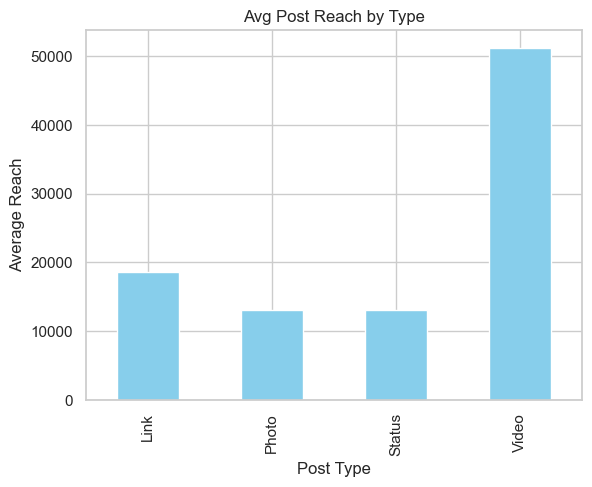

In [57]:
# BAR CHART - Avg Reach per Type
facebook_df.groupby('Type')['Lifetime Post Total Reach'].mean().plot(kind='bar', color='skyblue')
plt.title('Avg Post Reach by Type')
plt.ylabel('Average Reach')
plt.xlabel('Post Type')
plt.show()

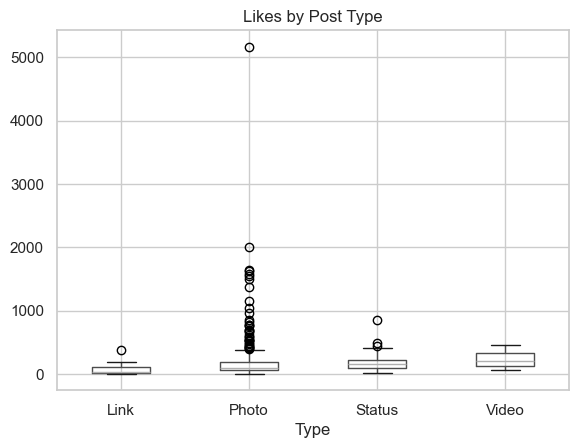

In [59]:
# BOX PLOT - Likes Distribution by Type
facebook_df.boxplot(column='like', by='Type')
plt.title('Likes by Post Type')
plt.suptitle('')
plt.show()


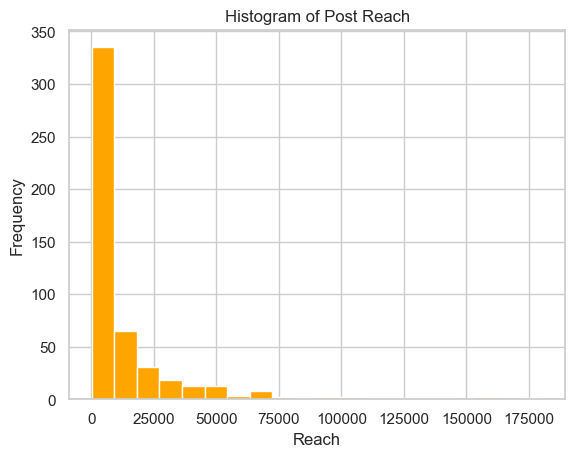

In [61]:
# HISTOGRAM - Post Reach
plt.hist(facebook_df['Lifetime Post Total Reach'], bins=20, color='orange')
plt.title('Histogram of Post Reach')
plt.xlabel('Reach')
plt.ylabel('Frequency')
plt.show()

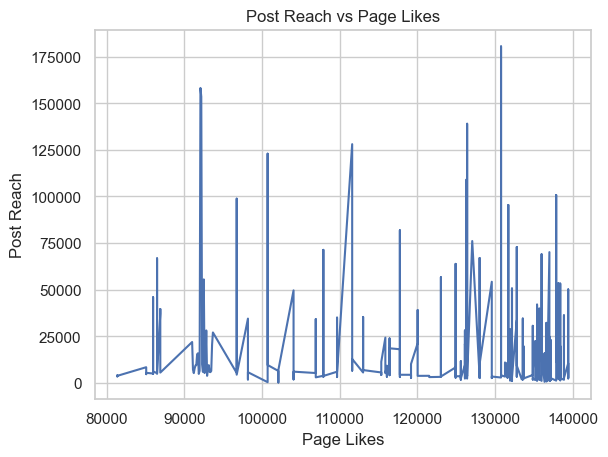

In [63]:
# LINE GRAPH - Reach Over Page Likes (sorted)
sorted_fb = facebook_df.sort_values('Page total likes')
plt.plot(sorted_fb['Page total likes'], sorted_fb['Lifetime Post Total Reach'])
plt.title('Post Reach vs Page Likes')
plt.xlabel('Page Likes')
plt.ylabel('Post Reach')
plt.show()

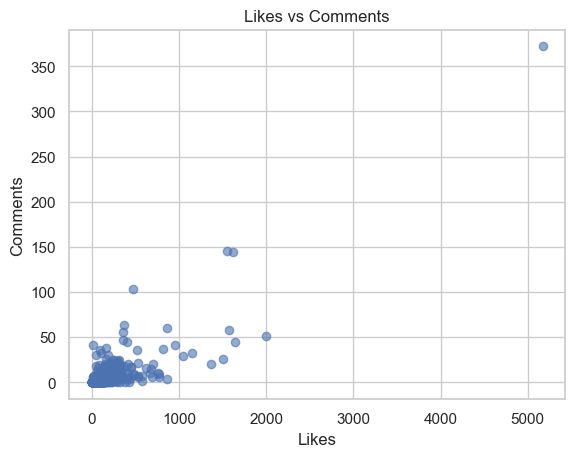

In [65]:
# SCATTER PLOT - Likes vs Comments
plt.scatter(facebook_df['like'], facebook_df['comment'], alpha=0.6)
plt.title('Likes vs Comments')
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.show()


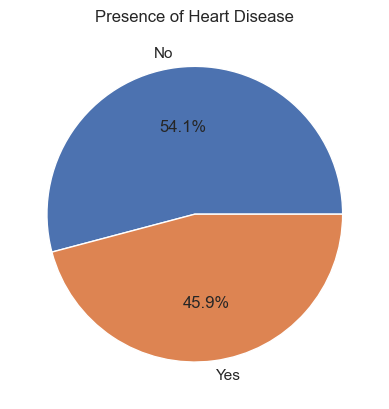

In [67]:
# =============================
# ❤️ Heart Disease Visuals
# =============================

# PIE CHART - AHD (target)
heart_df['AHD'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Presence of Heart Disease')
plt.ylabel('')
plt.show()

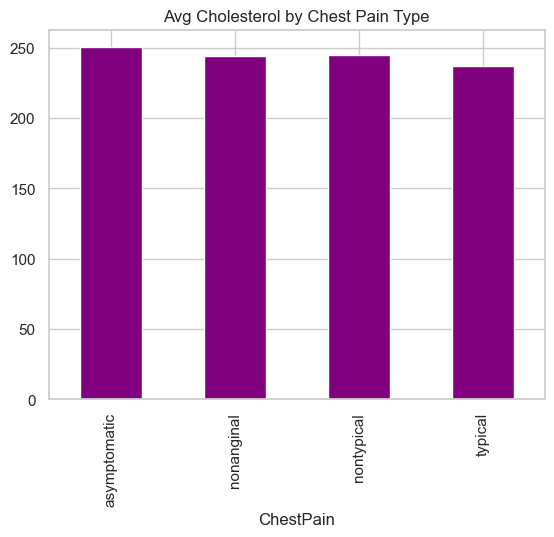

In [69]:
# BAR CHART - Avg Chol by Chest Pain
heart_df.groupby('ChestPain')['Chol'].mean().plot(kind='bar', color='purple')
plt.title('Avg Cholesterol by Chest Pain Type')
plt.show()


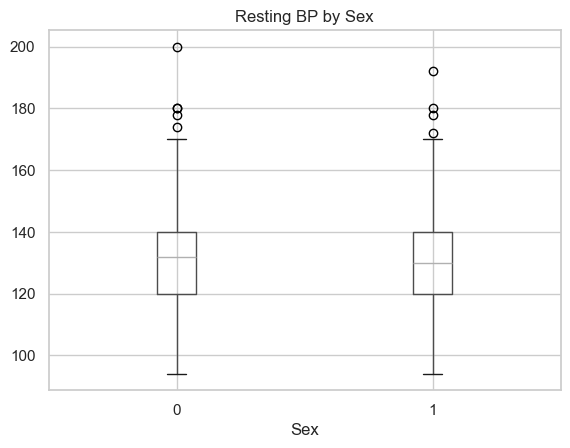

In [71]:
# BOX PLOT - RestBP by Sex
heart_df.boxplot(column='RestBP', by='Sex')
plt.title('Resting BP by Sex')
plt.suptitle('')
plt.show()

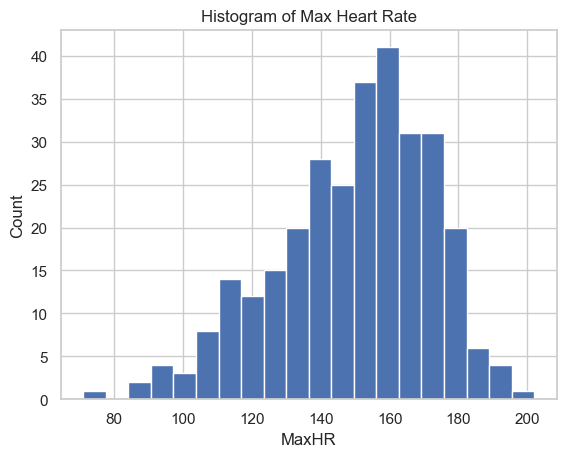

In [73]:
# HISTOGRAM - MaxHR
plt.hist(heart_df['MaxHR'], bins=20)
plt.title('Histogram of Max Heart Rate')
plt.xlabel('MaxHR')
plt.ylabel('Count')
plt.show()

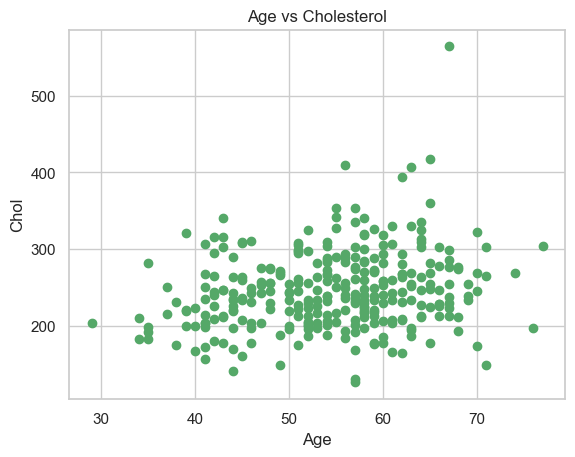

In [75]:

# LINE GRAPH - Age vs Chol
plt.plot(heart_df['Age'], heart_df['Chol'], 'go')
plt.title('Age vs Cholesterol')
plt.xlabel('Age')
plt.ylabel('Chol')
plt.show()

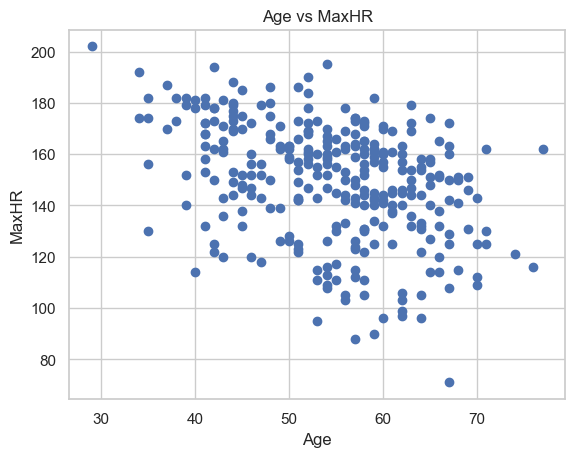

In [77]:
# SCATTER PLOT - Age vs MaxHR
plt.scatter(heart_df['Age'], heart_df['MaxHR'])
plt.title('Age vs MaxHR')
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.show()


In [89]:
# =============================
# 🌫️ Air Quality Visuals
# =============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV safely with modern pandas (skip bad lines)
air_df = pd.read_csv('AirQuality.csv', sep=';', decimal=',', on_bad_lines='skip', encoding='latin1')

# Drop any unnamed columns that are completely empty
air_df = air_df.loc[:, ~air_df.columns.str.contains('^Unnamed')]


In [95]:
# Drop any unnamed columns that are completely empty
air_df = air_df.loc[:, ~air_df.columns.str.contains('^Unnamed')]


In [97]:
air_df['Datetime'] = pd.to_datetime(
    air_df['Date'] + ' ' + air_df['Time'],
    format='%d/%m/%Y %H.%M.%S',
    errors='coerce'
)


In [99]:
# Drop rows with invalid datetime
air_df.dropna(subset=['Datetime'], inplace=True)

In [101]:
# Convert all other columns (except Date, Time, Datetime) to numeric
for col in air_df.columns[2:]:
    air_df[col] = pd.to_numeric(air_df[col], errors='coerce')

In [103]:
# Drop rows where all key pollutant columns are NaN
air_df.dropna(subset=['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)'], how='all', inplace=True)

In [105]:
# Convert the 'Date' and 'Time' into a single datetime column
air_df['Datetime'] = pd.to_datetime(air_df['Date'] + ' ' + air_df['Time'], format='%d/%m/%Y %H.%M.%S', errors='coerce')

# Handle missing data: Drop rows where Datetime or key columns are missing
air_df = air_df.dropna(subset=['Datetime'])


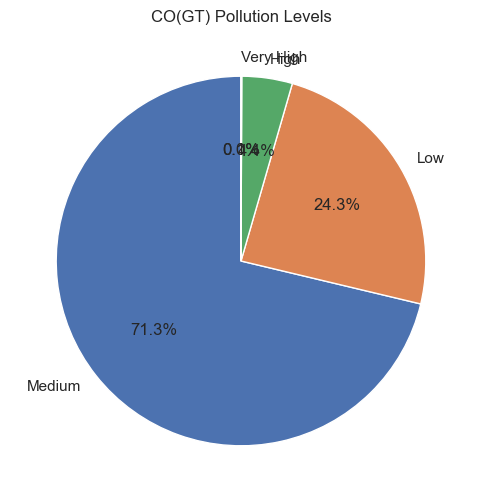

In [107]:
# Pie chart: CO(GT) Pollution Levels
bins = [0, 1, 5, 10, 20, float('inf')]  # Defining bins for CO(GT)
labels = ['Low', 'Medium', 'High', 'Very High', 'Extreme']  # Define labels for CO levels
air_df['CO_Level'] = pd.cut(air_df['CO(GT)'], bins=bins, labels=labels)
plt.figure(figsize=(6, 6))
air_df['CO_Level'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('CO(GT) Pollution Levels')
plt.ylabel('')  # To hide the y-axis label
plt.show()

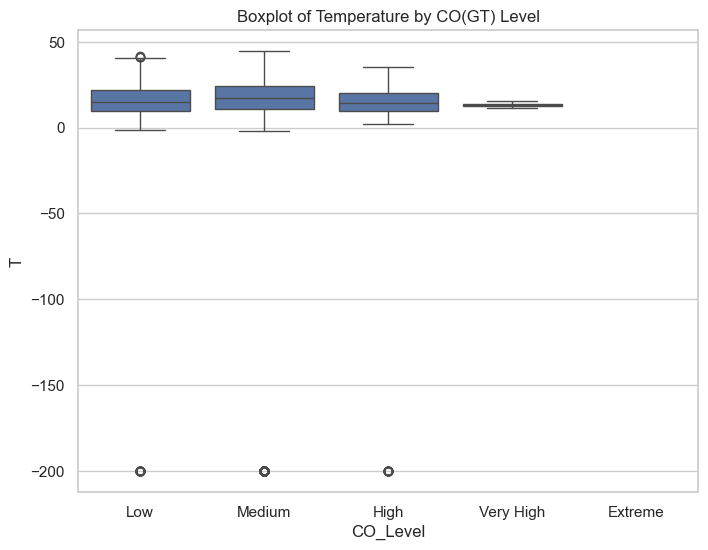

In [109]:
# Boxplot: CO(GT) vs Temperature (T)
plt.figure(figsize=(8, 6))
sns.boxplot(x='CO_Level', y='T', data=air_df)
plt.title('Boxplot of Temperature by CO(GT) Level')
plt.show()

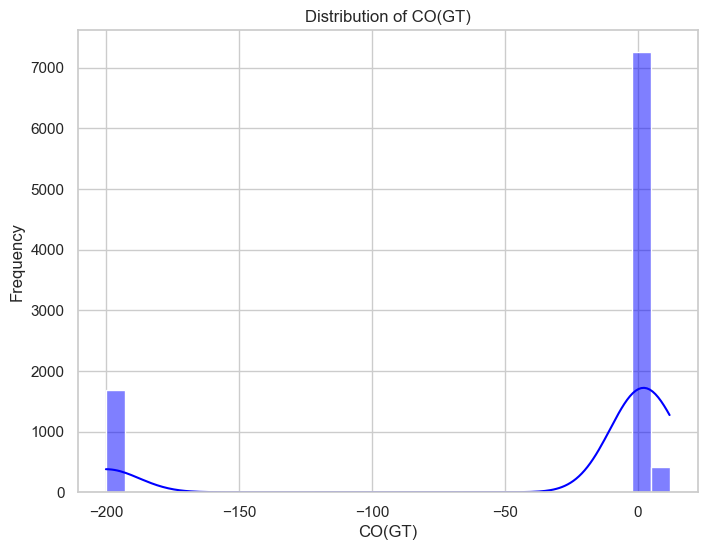

In [111]:
# Histogram: Distribution of CO(GT)
plt.figure(figsize=(8, 6))
sns.histplot(air_df['CO(GT)'], bins=30, kde=True, color='blue')
plt.title('Distribution of CO(GT)')
plt.xlabel('CO(GT)')
plt.ylabel('Frequency')
plt.show()

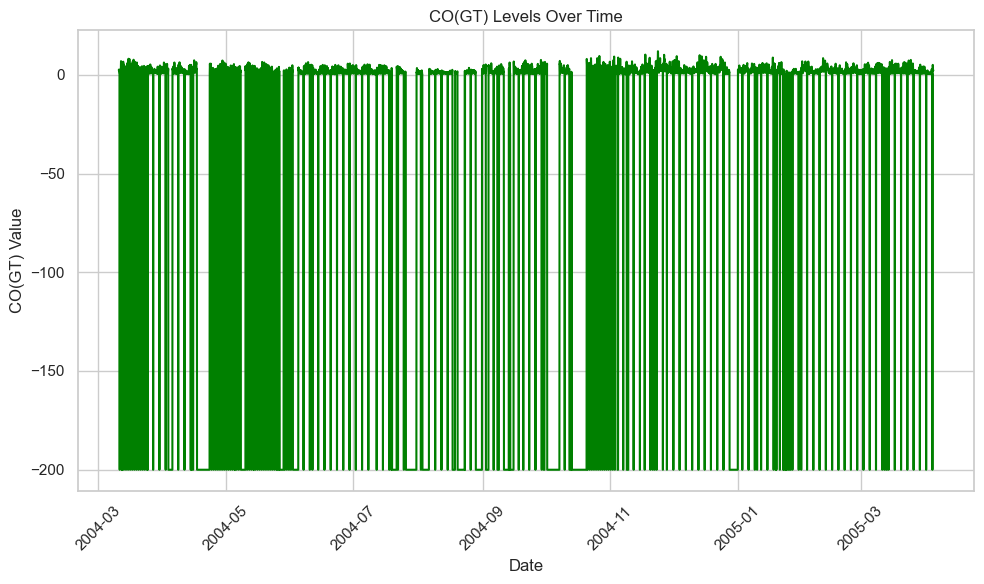

In [113]:
# Line Graph: CO(GT) levels over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=air_df['Datetime'], y=air_df['CO(GT)'], color='green')
plt.title('CO(GT) Levels Over Time')
plt.xlabel('Date')
plt.ylabel('CO(GT) Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

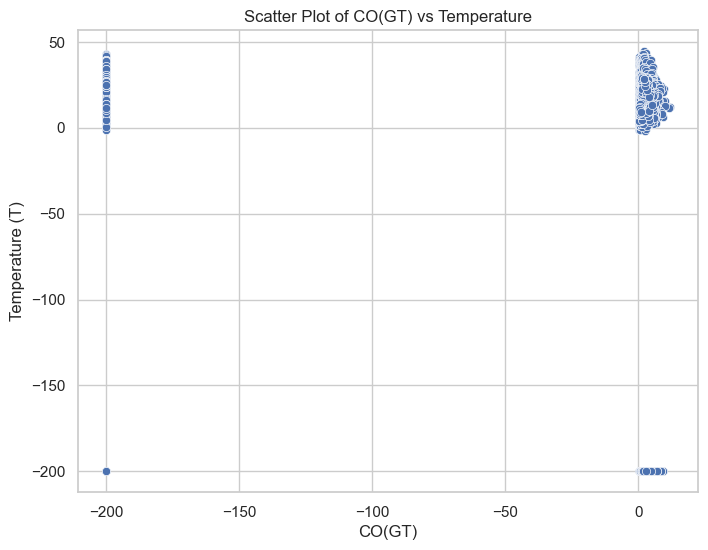

In [115]:

# Scatter Plot: CO(GT) vs Temperature (T)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CO(GT)', y='T', data=air_df)
plt.title('Scatter Plot of CO(GT) vs Temperature')
plt.xlabel('CO(GT)')
plt.ylabel('Temperature (T)')
plt.show()